# Responsiv interativitet

Foreløpig har vi brukt `interact` funksjonen i `ipywidgets` for å få interaktive plott. Dessverre har vi merket at ting kan gå litt tregt når vi gjør det på denne måten. Grunnen til dette er at `interact` funksjonen prøver å tegne figurer i sanntid mens vi drar i bryterne. Hvis Python bruker lengre tid på å lage figurene vil vi altså få en forsinkelse mellom bryterbevegelsen og oppdateringen av plottet. Dette er det to måter å løse dette problemet på:
 
 1. Ikke tegn i sanntid, men ha en oppdateringsknapp
 2. Tegn plottene raskere
 
Begge disse løsningene kan gjøres, men den første løsningen er lettest, så vi starter med den.

## Eksempel på tregt plott

In [1]:
from ipywidgets import interact
from pylab import arange, exp, pi, plot, show, sin

In [2]:
def plott_dempet_pendel(frekvens, dempingsstyrke):
    t = arange(0, 6, 0.01)
    x = exp(-dempingsstyrke*t)*sin(frekvens*t*(2*pi))
    
    plot(t, x)
    show()

In [3]:
interact(plott_dempet_pendel, frekvens=(0.0, 4.0), dempingsstyrke=(0.0, 1, 0.01))

interactive(children=(FloatSlider(value=2.0, description='frekvens', max=4.0), FloatSlider(value=0.5, descript…

<function __main__.plott_dempet_pendel(frekvens, dempingsstyrke)>

## Skru av sanntidsoppdatering
I eksempelet over så vi at det var en forsinkelse i oppdateringen av plottet. Hvis funksjonen som genererer plottet er avansert vil denne oppdateringen bli enda mer forsinket. Derfor kan det være en ide å ha en knapp som man manuelt må trykke på for å oppdatere plottet. Det kan vi gjøre med `interact_manual` funksjonen fra `ipywidgets` biblioteket.

In [4]:
from ipywidgets import interact_manual

In [5]:
interact_manual(plott_dempet_pendel, frekvens=(0.0, 4.0), dempingsstyrke=(0.0, 1, 0.01))

interactive(children=(FloatSlider(value=2.0, description='frekvens', max=4.0), FloatSlider(value=0.5, descript…

<function __main__.plott_dempet_pendel(frekvens, dempingsstyrke)>

## Endre på allerede eksisterende plott

Hvis vi fortsatt ønsker sanntidsendringer på plottene våre men ikke ønsker at det skal bli en tidsforsinkelse må vi rett og slett endre hvordan vi tegner figurene våre. Foreløpig lager Python et nytt bilde hver gang vi kaller på funksjonen, og det tar tid. Istedenfor kan vi vise frem plottet på en måte slik at vi kan modifisere det. Da trenger vi ikke tegne alt på nytt hver gang!

For å gjøre dette må vi endre litt på hvordan vi plotter. Siden vi kan endre på figurene våre, må vi ha kontroll på hvilken figur vi vil endre på. La oss se hvordan vi kan gjøre det.

Først skrur vi på interaktiv plotting med denne linjen (av og til må du kjøre den linja to ganger for at det skal virke):

In [6]:
%matplotlib notebook

Så importerer vi funksjonen for å lage nye figurer fra `pylab`

In [7]:
from pylab import figure

Så oppretter vi en figur, og tegner i den.

<IPython.core.display.Javascript object>


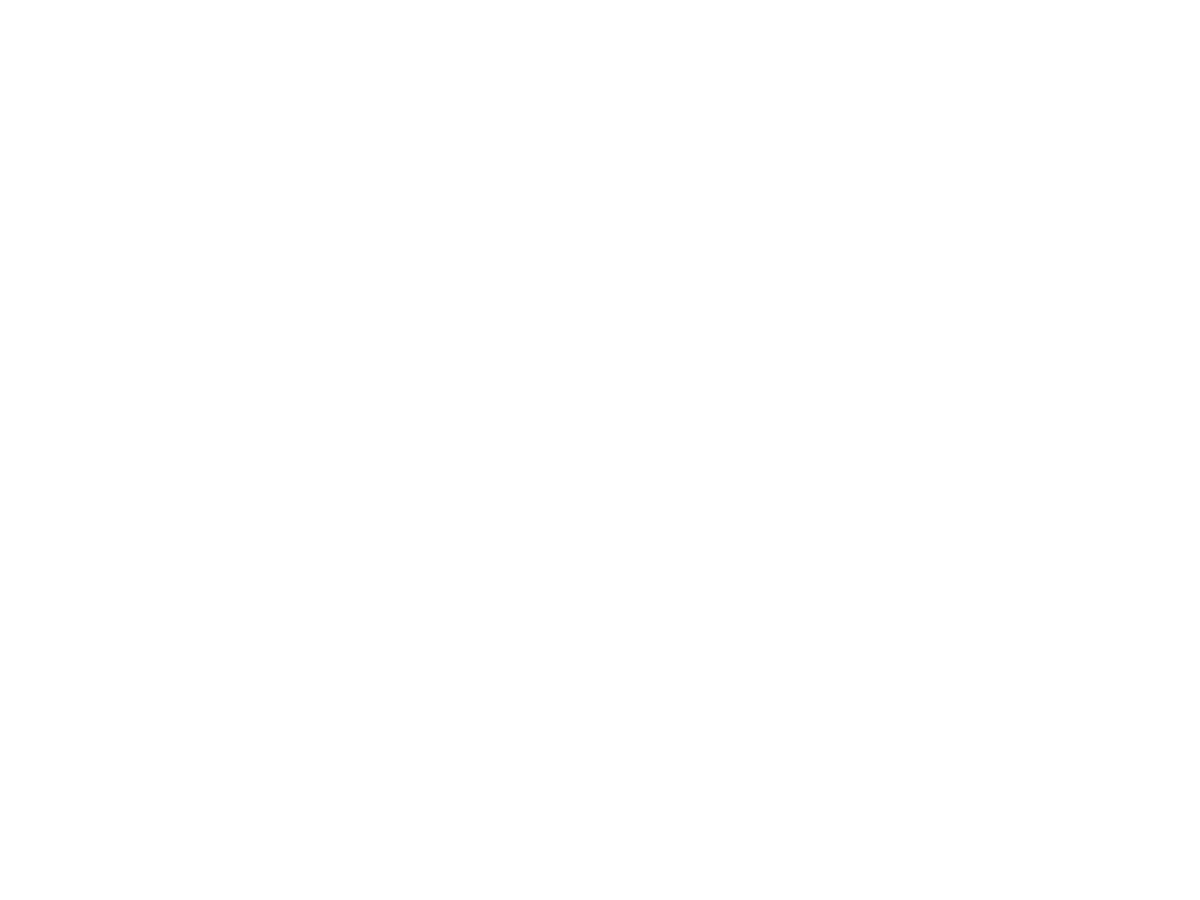

In [8]:
figur = figure()
show()

Her ber vi Python om å lage en figur til oss. Dette blir da et blankt område på skjermen som vi kan tegne i. Det neste steget for å plotte er å lage et sett med akser, det gjør vi slik:

<IPython.core.display.Javascript object>


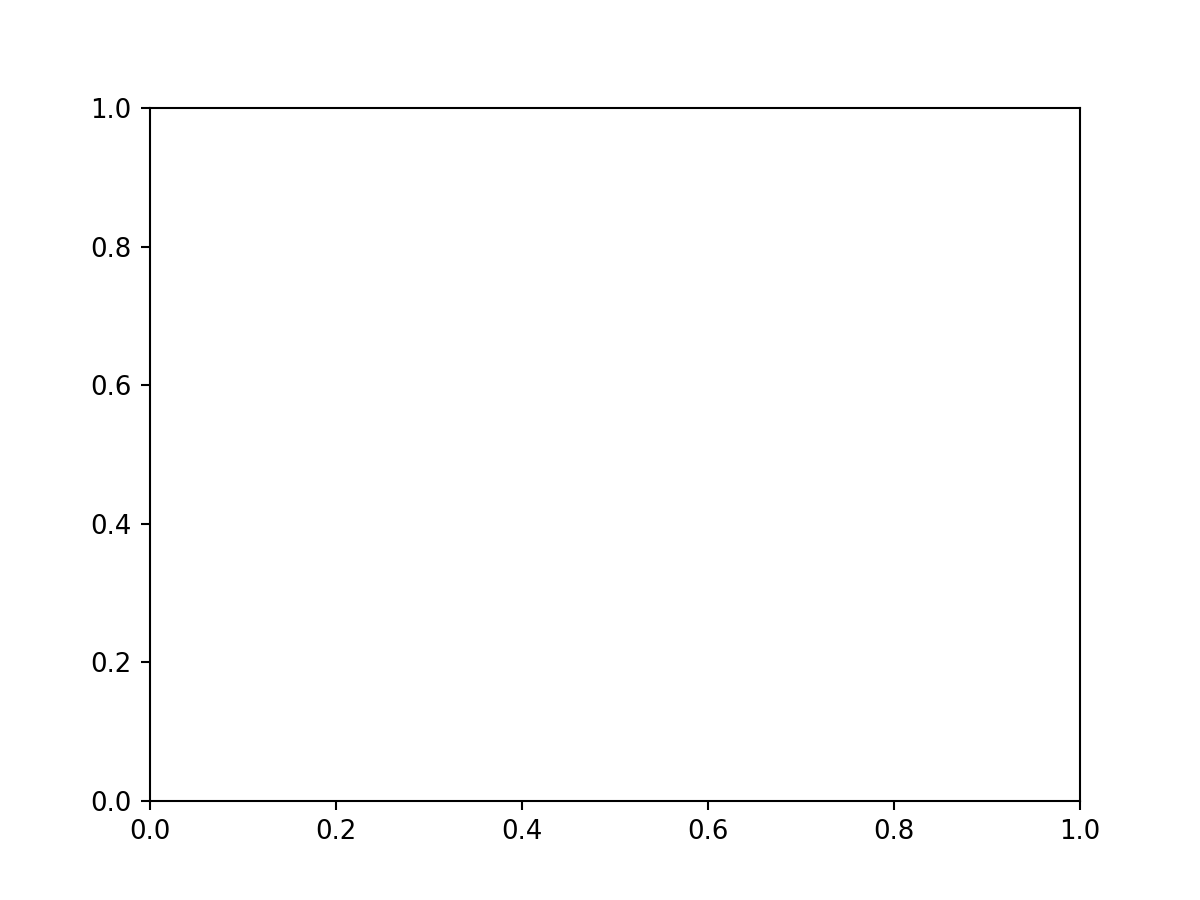

In [9]:
figur = figure()
akser = figur.add_subplot()
show()

Ved å skrive `akser = figur.add_subplot()` ber vi Python om å lage et settt med akser inni figuren vi lagret i `figur`-variabelen vår. Så lagrer vi dette settet med akser inni variabbelen `akser`. La oss nå plotte noe inni disse aksene.

<IPython.core.display.Javascript object>


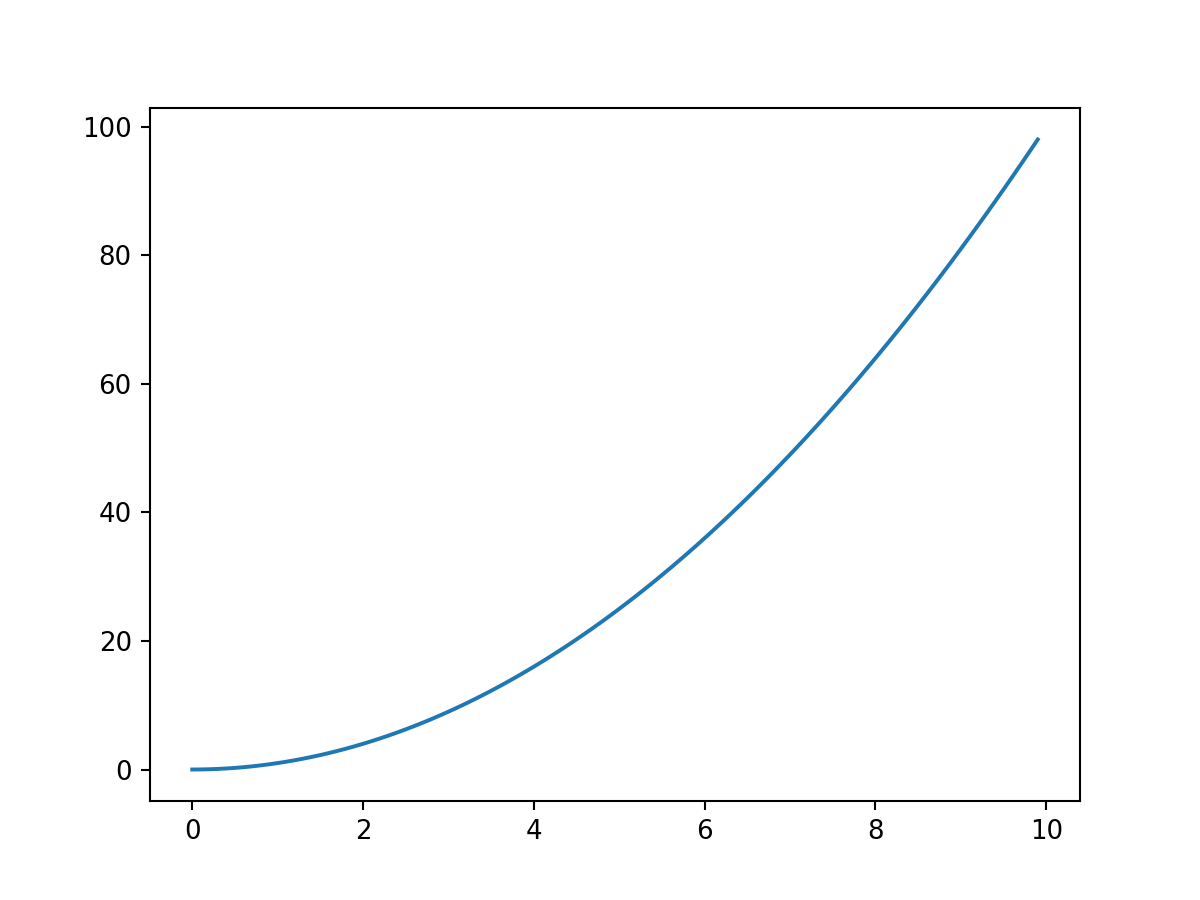

In [10]:
figur = figure()
akser = figur.add_subplot()

x = arange(0, 10, 0.1)
y = x**2
akser.plot(x, y)
show()

Vi ser at vi her sier spesifikt hvilke akser vi skal plotte inni. Dette er strengt tatt ikke nødvendig, for hvis man bare bruker `plot` funksjonen som vi har brukt tidligere så vil man tegne i de aksene man sist opprettet. Grunnen til at vi ikke gjør det er at det da lett kan bli vanskelig å holde styr på aksene hvis vi har flere figurer i samme notebook.

La oss nå sette sammen det vi har lært.

<IPython.core.display.Javascript object>


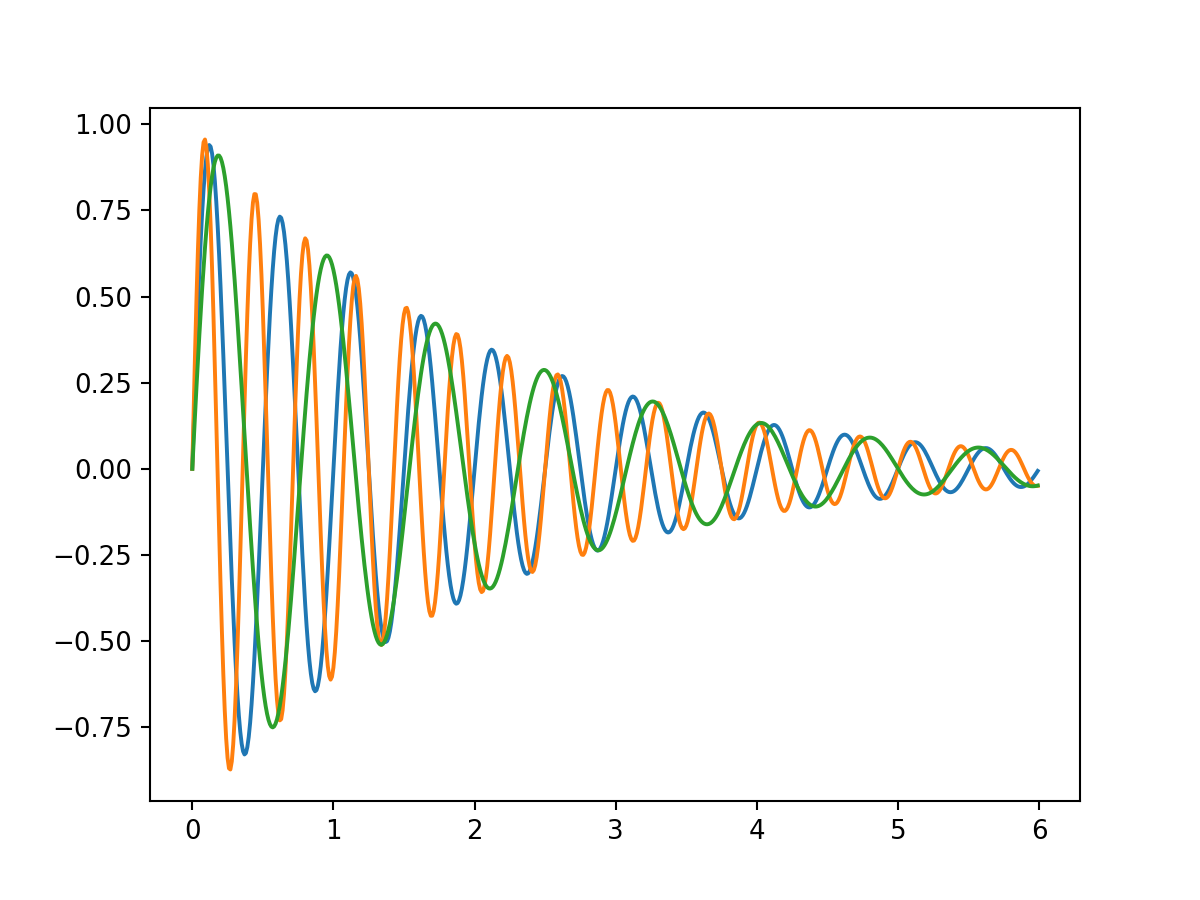

interactive(children=(FloatSlider(value=2.0, description='frekvens', max=4.0), FloatSlider(value=0.5, descript…

<function __main__.plott_dempet_pendel_interaktivt(frekvens, dempingsstyrke)>

In [11]:
figur = figure()
akser = figur.add_subplot()

def plott_dempet_pendel_interaktivt(frekvens, dempingsstyrke):
    t = arange(0, 6, 0.01)
    x = exp(-dempingsstyrke*t)*sin(frekvens*t*(2*pi))
    
    akser.plot(t, x)
    show()

interact(plott_dempet_pendel_interaktivt, frekvens=(0.0, 4.0), dempingsstyrke=(0.0, 1, 0.01))

Her ser vi at det nesten funker, det eneste problemet er at vi tegner nye linjer istedenfor å endre den vi allerede har. Dette kan vi ordne med å viske vekk den forrige linja hver gang funksjonen plottes.

<IPython.core.display.Javascript object>


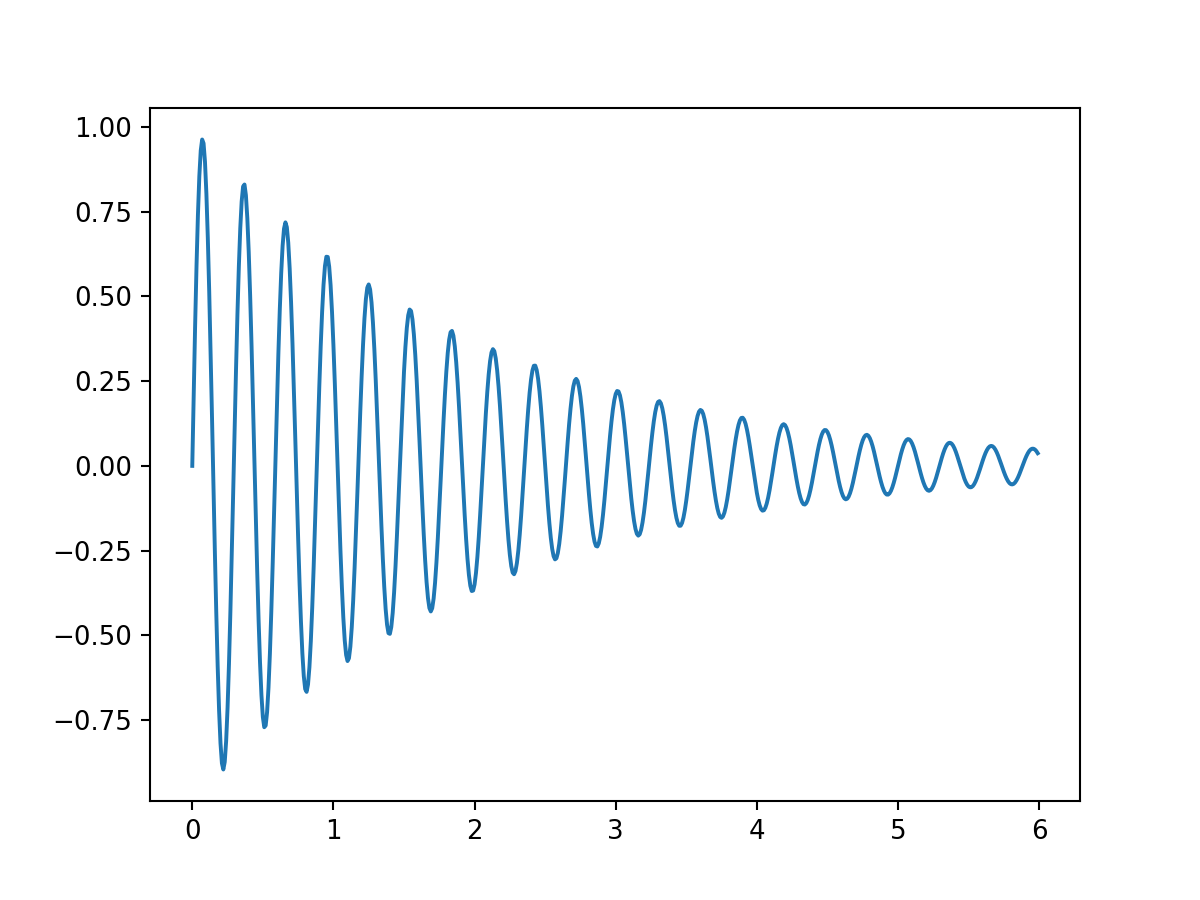

interactive(children=(FloatSlider(value=2.0, description='frekvens', max=4.0), FloatSlider(value=0.5, descript…

<function __main__.plott_dempet_pendel_interaktivt(frekvens, dempingsstyrke)>

In [12]:
figur = figure()
akser = figur.add_subplot()

def plott_dempet_pendel_interaktivt(frekvens, dempingsstyrke):
    akser.clear()
    
    t = arange(0, 6, 0.01)
    x = exp(-dempingsstyrke*t)*sin(frekvens*t*(2*pi))
    
    akser.plot(t, x)
    show()

interact(plott_dempet_pendel_interaktivt, frekvens=(0.0, 4.0), dempingsstyrke=(0.0, 1, 0.01))

### OBS: Du bør ha forskjellige variabelnavn på de forskjellige figurene

I koden vi har skrevet her brukte vi alltid samme navn på alle figurene, det betyr at det alltid er den siste figuren vi opprettet som blir endret. Hvis vi vil ha mer enn en figur i samme notatbok må du passe på at alle figurene og alle aksene har forskjellige variabelnavn.

<IPython.core.display.Javascript object>


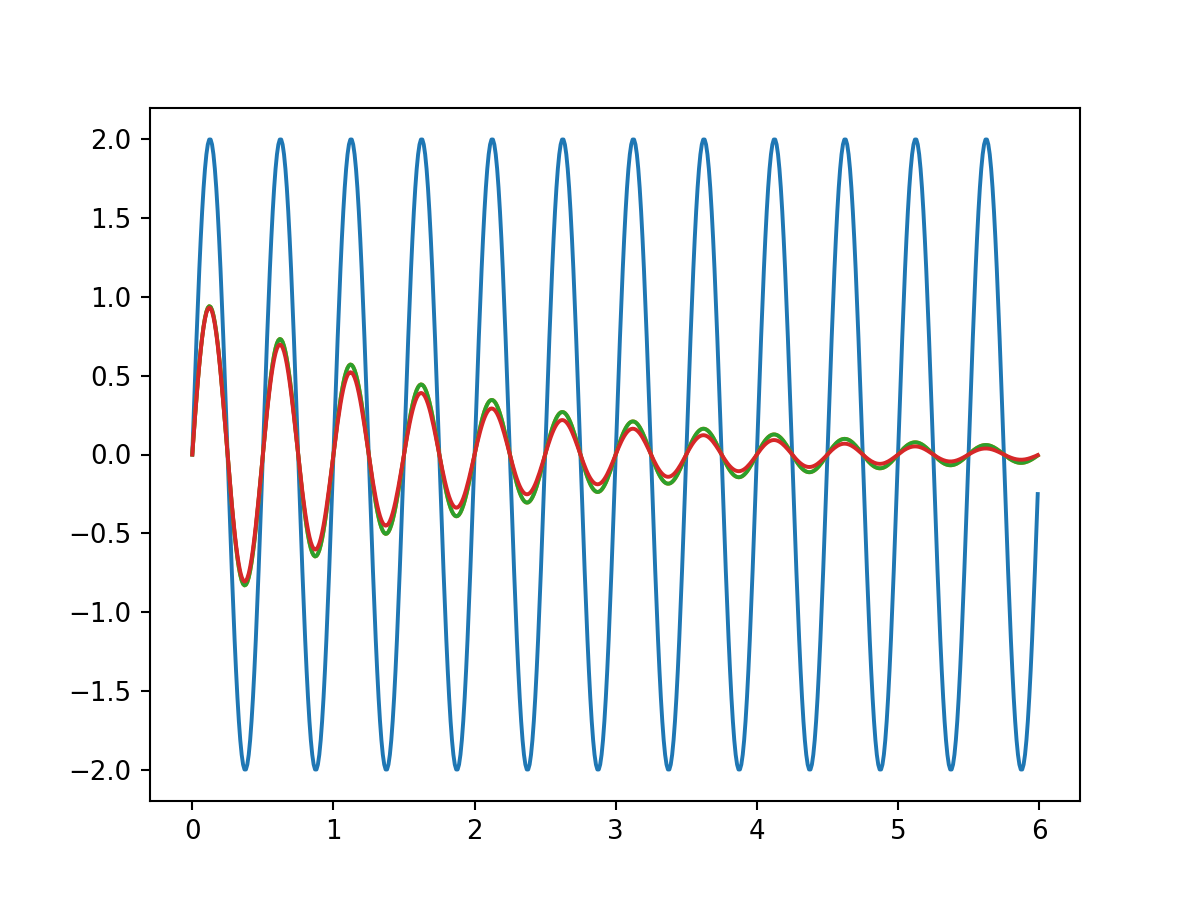

interactive(children=(FloatSlider(value=2.0, description='frekvens1', max=4.0), FloatSlider(value=2.0, descrip…

<function __main__.plott_dempet_pendel_interaktivt(frekvens1, frekvens2)>

In [13]:
sinussum_figur = figure()
sinussum_akser = sinussum_figur.add_subplot()

def plott_dempet_pendel_interaktivt(frekvens1, frekvens2):
    sinussum_akser.clear()
    
    t = arange(0, 6, 0.01)
    x = sin(frekvens1*t*2*pi) + sin(frekvens2*t*2*pi)
    
    sinussum_akser.plot(t, x)
    show()

interact(plott_dempet_pendel_interaktivt, frekvens1=(0.0, 4.0), frekvens2=(0.0, 4.0))